# Evaluacion del DataSet

## Imports

In [1]:
import arff
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler

## Lectura del DataSet

In [ ]:
data = pd.read_csv('titanic3.csv')

In [20]:
data.head(10)

,Passengers,pclass,survived,name,length_name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,person_rate,Characteristic_of_Number _Name,Name_Length,Age_group
0,1,1,1,"Allen, Miss. Elisabeth Walton",29,female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",211.337500,1,4,Adulto Joven
1,2,1,1,"Allison, Master. Hudson Trevor",30,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",37.887500,1,4,Niño
2,3,1,0,"Allison, Miss. Helen Loraine",28,female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",37.887500,0,4,Niño
3,4,1,0,"Allison, Mr. Hudson Joshua Creighton",36,male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",37.887500,0,5,Adulto Joven
4,5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",47,female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",37.887500,0,8,Adulto Joven
5,6,1,1,"Anderson, Mr. Harry",19,male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",26.550000,1,3,Adulto
6,7,1,1,"Andrews, Miss. Kornelia Theodosia",33,female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",38.979150,1,4,Adulto Mayor
7,8,1,0,"Andrews, Mr. Thomas Jr",22,male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",0.000000,0,4,Adulto
8,9,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",45,female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",17.159733,1,6,Adulto
9,10,1,0,"Artagaveytia, Mr. Ramon",23,male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",49.504200,0,3,Adulto Mayor


In [21]:
print(data.columns)

Index(['Passengers', 'pclass', 'survived', 'name', 'length_name', 'sex', 'age',
       'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body',
       'home.dest', 'person_rate', 'Characteristic_of_Number _Name',
       'Name_Length', 'Age_group'],
      dtype='object')


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
import pandas as pd

# Cargar datos
data = pd.read_csv('titanic3.csv')

# Dividir el DataSet en conjunto de entrenamiento y conjunto de validación
X = data.drop('survived', axis=1)
y = data['survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir columnas numéricas y categóricas
numeric_cols = ['length_name', 'age', 'sibsp', 'parch', 'fare', 'person_rate','Characteristic_of_Number _Name', 'Name_Length']
categorical_cols = ['pclass', 'sex', 'embarked', 'Age_group']

# Definir transformadores para datos numéricos y categóricos
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar transformadores en un preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Definir el modelo
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en los datos de validación
y_val_pred = model.predict(X_val)

# Calcular y mostrar la precisión
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


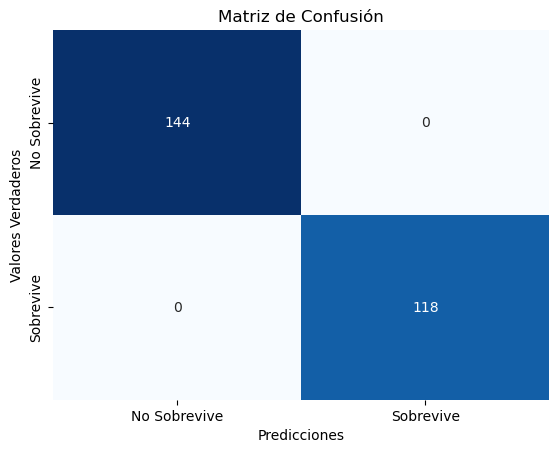

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score

# Hacer predicciones en los datos de validación
y_val_pred = model.predict(X_val)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_val, y_val_pred)

# Crear un heatmap de la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['No Sobrevive', 'Sobrevive'], yticklabels=['No Sobrevive', 'Sobrevive'])

plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()

In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Hacer predicciones en los datos de validación
y_val_pred = model.predict(X_val)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_val, y_val_pred)

# Calcular precision, recall y f1_score
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

# Mostrar las métricas
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 1.0
Recall: 1.0
F1 Score: 1.0
